# Sentiment Analysis on the FOMC statements

In [1]:
import pandas as pd
import numpy as np

In [3]:
# Read in the FOMC statements from CSV
df_fomc_stmts = pd.read_csv('../derived/FOMC_statements.csv')
df_fomc_stmts['date']= pd.to_datetime(df_fomc_stmts['date'])
df_fomc_stmts.head(3)

,statement_id,date,year,url,text,length,chairperson
0,1,2007-01-31,2007,https://www.federalreserve.gov/newsevents/pres...,The Federal Open Market Committee decided toda...,173,Bernanke
1,2,2007-03-21,2007,https://www.federalreserve.gov/newsevents/pres...,The Federal Open Market Committee decided toda...,162,Bernanke
2,3,2007-05-09,2007,https://www.federalreserve.gov/newsevents/pres...,The Federal Open Market Committee decided toda...,161,Bernanke


In [110]:
# Data Transformation
# to lowercase all characters
df_fomc_stmts['text'] = df_fomc_stmts['text'].astype(str).str.lower()
df_fomc_stmts.head(3)

,statement_id,date,year,url,text,length,chairperson
0,1,2007-01-31,2007,https://www.federalreserve.gov/newsevents/pres...,the federal open market committee decided toda...,173,Bernanke
1,2,2007-03-21,2007,https://www.federalreserve.gov/newsevents/pres...,the federal open market committee decided toda...,162,Bernanke
2,3,2007-05-09,2007,https://www.federalreserve.gov/newsevents/pres...,the federal open market committee decided toda...,161,Bernanke


In [111]:
# Tokenization
from nltk.tokenize import RegexpTokenizer

In [112]:
regexp = RegexpTokenizer('\w+')
df_fomc_stmts['text_token'] = df_fomc_stmts['text'].apply(regexp.tokenize)
df_fomc_stmts.head(3)

,statement_id,date,year,url,text,length,chairperson,text_token
0,1,2007-01-31,2007,https://www.federalreserve.gov/newsevents/pres...,the federal open market committee decided toda...,173,Bernanke,"[the, federal, open, market, committee, decide..."
1,2,2007-03-21,2007,https://www.federalreserve.gov/newsevents/pres...,the federal open market committee decided toda...,162,Bernanke,"[the, federal, open, market, committee, decide..."
2,3,2007-05-09,2007,https://www.federalreserve.gov/newsevents/pres...,the federal open market committee decided toda...,161,Bernanke,"[the, federal, open, market, committee, decide..."


In [113]:
# Stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
# Make a list of english stopwords
stopwords = nltk.corpus.stopwords.words('english')
# Use a lambda function to remove the stopwords
df_fomc_stmts['text_token'] = df_fomc_stmts['text_token'].apply(lambda x: [item for item in x if item not in stopwords])
df_fomc_stmts.head(3)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/philiptanofsky/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,statement_id,date,year,url,text,length,chairperson,text_token
0,1,2007-01-31,2007,https://www.federalreserve.gov/newsevents/pres...,the federal open market committee decided toda...,173,Bernanke,"[federal, open, market, committee, decided, to..."
1,2,2007-03-21,2007,https://www.federalreserve.gov/newsevents/pres...,the federal open market committee decided toda...,162,Bernanke,"[federal, open, market, committee, decided, to..."
2,3,2007-05-09,2007,https://www.federalreserve.gov/newsevents/pres...,the federal open market committee decided toda...,161,Bernanke,"[federal, open, market, committee, decided, to..."


In [114]:
# Combine text_token into one string
df_fomc_stmts['text_token'] = df_fomc_stmts['text_token'].apply(lambda x: ' '.join([item for item in x]))
df_fomc_stmts.head(3)

,statement_id,date,year,url,text,length,chairperson,text_token
0,1,2007-01-31,2007,https://www.federalreserve.gov/newsevents/pres...,the federal open market committee decided toda...,173,Bernanke,federal open market committee decided today ke...
1,2,2007-03-21,2007,https://www.federalreserve.gov/newsevents/pres...,the federal open market committee decided toda...,162,Bernanke,federal open market committee decided today ke...
2,3,2007-05-09,2007,https://www.federalreserve.gov/newsevents/pres...,the federal open market committee decided toda...,161,Bernanke,federal open market committee decided today ke...


In [115]:
# Lemmatization
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/philiptanofsky/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [116]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/philiptanofsky/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [117]:
from nltk.stem import WordNetLemmatizer

In [118]:
wordnet_lem = WordNetLemmatizer()
df_fomc_stmts['text_token'] = df_fomc_stmts['text_token'].apply(wordnet_lem.lemmatize)
df_fomc_stmts.head(3)

,statement_id,date,year,url,text,length,chairperson,text_token
0,1,2007-01-31,2007,https://www.federalreserve.gov/newsevents/pres...,the federal open market committee decided toda...,173,Bernanke,federal open market committee decided today ke...
1,2,2007-03-21,2007,https://www.federalreserve.gov/newsevents/pres...,the federal open market committee decided toda...,162,Bernanke,federal open market committee decided today ke...
2,3,2007-05-09,2007,https://www.federalreserve.gov/newsevents/pres...,the federal open market committee decided toda...,161,Bernanke,federal open market committee decided today ke...


In [119]:
# I now have the full text and the text_token column, apply Sentiment to both columns

In [120]:
# Sentiment Intensity Analyzer
from nltk.sentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
# Polarity scores
# Use the `polarity_scores` method
df_fomc_stmts['polarity'] = df_fomc_stmts['text'].apply(lambda x: analyzer.polarity_scores(x))
df_fomc_stmts.head(3)

,statement_id,date,year,url,text,length,chairperson,text_token,polarity
0,1,2007-01-31,2007,https://www.federalreserve.gov/newsevents/pres...,the federal open market committee decided toda...,173,Bernanke,federal open market committee decided today ke...,"{'neg': 0.048, 'neu': 0.897, 'pos': 0.055, 'co..."
1,2,2007-03-21,2007,https://www.federalreserve.gov/newsevents/pres...,the federal open market committee decided toda...,162,Bernanke,federal open market committee decided today ke...,"{'neg': 0.06, 'neu': 0.911, 'pos': 0.029, 'com..."
2,3,2007-05-09,2007,https://www.federalreserve.gov/newsevents/pres...,the federal open market committee decided toda...,161,Bernanke,federal open market committee decided today ke...,"{'neg': 0.06, 'neu': 0.896, 'pos': 0.044, 'com..."


In [121]:
# Transform data
# change data structure
df_fomc_stmts = pd.concat(
    [df_fomc_stmts.drop(['url', 'polarity'], axis=1),
     df_fomc_stmts['polarity'].apply(pd.Series)], axis=1)
df_fomc_stmts.head(3)

,statement_id,date,year,text,length,chairperson,text_token,neg,neu,pos,compound
0,1,2007-01-31,2007,the federal open market committee decided toda...,173,Bernanke,federal open market committee decided today ke...,0.048,0.897,0.055,0.3122
1,2,2007-03-21,2007,the federal open market committee decided toda...,162,Bernanke,federal open market committee decided today ke...,0.060,0.911,0.029,-0.6486
2,3,2007-05-09,2007,the federal open market committee decided toda...,161,Bernanke,federal open market committee decided today ke...,0.060,0.896,0.044,-0.4019


In [122]:
df_fomc_stmts = pd.concat(
    [df_fomc_stmts.drop(['neg', 'neu', 'pos'], axis=1)])
df_fomc_stmts.head(3)

,statement_id,date,year,text,length,chairperson,text_token,compound
0,1,2007-01-31,2007,the federal open market committee decided toda...,173,Bernanke,federal open market committee decided today ke...,0.3122
1,2,2007-03-21,2007,the federal open market committee decided toda...,162,Bernanke,federal open market committee decided today ke...,-0.6486
2,3,2007-05-09,2007,the federal open market committee decided toda...,161,Bernanke,federal open market committee decided today ke...,-0.4019


In [123]:
cols = ['statement_id',
        'date',
        'year',
        'chairperson',
        'text',
        'compound',
        'length',
        'text_token']

In [124]:
df_fomc_stmts = df_fomc_stmts[cols]
df_fomc_stmts.rename(columns={'compound':'text_polarity_sia'}, inplace=True)
df_fomc_stmts.head(5)

,statement_id,date,year,chairperson,text,text_polarity_sia,length,text_token
0,1,2007-01-31,2007,Bernanke,the federal open market committee decided toda...,0.3122,173,federal open market committee decided today ke...
1,2,2007-03-21,2007,Bernanke,the federal open market committee decided toda...,-0.6486,162,federal open market committee decided today ke...
2,3,2007-05-09,2007,Bernanke,the federal open market committee decided toda...,-0.4019,161,federal open market committee decided today ke...
3,4,2007-06-28,2007,Bernanke,the federal open market committee decided toda...,0.4588,175,federal open market committee decided today ke...
4,5,2007-08-07,2007,Bernanke,the federal open market committee decided toda...,0.9201,204,federal open market committee decided today ke...


In [125]:
# Sentiment Intensity Analyzer
from nltk.sentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
# Polarity scores
# Use the `polarity_scores` method
df_fomc_stmts['polarity'] = df_fomc_stmts['text_token'].apply(lambda x: analyzer.polarity_scores(x))
df_fomc_stmts.head(3)

,statement_id,date,year,chairperson,text,text_polarity_sia,length,text_token,polarity
0,1,2007-01-31,2007,Bernanke,the federal open market committee decided toda...,0.3122,173,federal open market committee decided today ke...,"{'neg': 0.074, 'neu': 0.841, 'pos': 0.085, 'co..."
1,2,2007-03-21,2007,Bernanke,the federal open market committee decided toda...,-0.6486,162,federal open market committee decided today ke...,"{'neg': 0.093, 'neu': 0.862, 'pos': 0.045, 'co..."
2,3,2007-05-09,2007,Bernanke,the federal open market committee decided toda...,-0.4019,161,federal open market committee decided today ke...,"{'neg': 0.091, 'neu': 0.842, 'pos': 0.067, 'co..."


In [126]:
# Transform data
# change data structure
df_fomc_stmts = pd.concat(
    [df_fomc_stmts.drop(['polarity'], axis=1),
     df_fomc_stmts['polarity'].apply(pd.Series)], axis=1)
df_fomc_stmts.head(3)

,statement_id,date,year,chairperson,text,text_polarity_sia,length,text_token,neg,neu,pos,compound
0,1,2007-01-31,2007,Bernanke,the federal open market committee decided toda...,0.3122,173,federal open market committee decided today ke...,0.074,0.841,0.085,0.3122
1,2,2007-03-21,2007,Bernanke,the federal open market committee decided toda...,-0.6486,162,federal open market committee decided today ke...,0.093,0.862,0.045,-0.6486
2,3,2007-05-09,2007,Bernanke,the federal open market committee decided toda...,-0.4019,161,federal open market committee decided today ke...,0.091,0.842,0.067,-0.4019


In [127]:
df_fomc_stmts = pd.concat(
    [df_fomc_stmts.drop(['neg', 'neu', 'pos'], axis=1)])
df_fomc_stmts.head(3)

,statement_id,date,year,chairperson,text,text_polarity_sia,length,text_token,compound
0,1,2007-01-31,2007,Bernanke,the federal open market committee decided toda...,0.3122,173,federal open market committee decided today ke...,0.3122
1,2,2007-03-21,2007,Bernanke,the federal open market committee decided toda...,-0.6486,162,federal open market committee decided today ke...,-0.6486
2,3,2007-05-09,2007,Bernanke,the federal open market committee decided toda...,-0.4019,161,federal open market committee decided today ke...,-0.4019


In [128]:
df_fomc_stmts.rename(columns={'compound':'text_token_polarity_sia'}, inplace=True)
df_fomc_stmts.head(5)

,statement_id,date,year,chairperson,text,text_polarity_sia,length,text_token,text_token_polarity_sia
0,1,2007-01-31,2007,Bernanke,the federal open market committee decided toda...,0.3122,173,federal open market committee decided today ke...,0.3122
1,2,2007-03-21,2007,Bernanke,the federal open market committee decided toda...,-0.6486,162,federal open market committee decided today ke...,-0.6486
2,3,2007-05-09,2007,Bernanke,the federal open market committee decided toda...,-0.4019,161,federal open market committee decided today ke...,-0.4019
3,4,2007-06-28,2007,Bernanke,the federal open market committee decided toda...,0.4588,175,federal open market committee decided today ke...,0.4588
4,5,2007-08-07,2007,Bernanke,the federal open market committee decided toda...,0.9201,204,federal open market committee decided today ke...,0.9201


In [129]:
# Let's do TextBlob
# Textblob
# https://planspace.org/20150607-textblob_sentiment/
from textblob import TextBlob

df_fomc_stmts['text_polarity_tb'] = df_fomc_stmts['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df_fomc_stmts.head(5)


,statement_id,date,year,chairperson,text,text_polarity_sia,length,text_token,text_token_polarity_sia,text_polarity_tb
0,1,2007-01-31,2007,Bernanke,the federal open market committee decided toda...,0.3122,173,federal open market committee decided today ke...,0.3122,0.050769
1,2,2007-03-21,2007,Bernanke,the federal open market committee decided toda...,-0.6486,162,federal open market committee decided today ke...,-0.6486,-0.008750
2,3,2007-05-09,2007,Bernanke,the federal open market committee decided toda...,-0.4019,161,federal open market committee decided today ke...,-0.4019,0.020667
3,4,2007-06-28,2007,Bernanke,the federal open market committee decided toda...,0.4588,175,federal open market committee decided today ke...,0.4588,0.037843
4,5,2007-08-07,2007,Bernanke,the federal open market committee decided toda...,0.9201,204,federal open market committee decided today ke...,0.9201,0.030635


In [130]:
df_fomc_stmts['text_token_polarity_tb'] = df_fomc_stmts['text_token'].apply(lambda x: TextBlob(x).sentiment.polarity)
df_fomc_stmts.head(5)

,statement_id,date,year,chairperson,text,text_polarity_sia,length,text_token,text_token_polarity_sia,text_polarity_tb,text_token_polarity_tb
0,1,2007-01-31,2007,Bernanke,the federal open market committee decided toda...,0.3122,173,federal open market committee decided today ke...,0.3122,0.050769,0.050769
1,2,2007-03-21,2007,Bernanke,the federal open market committee decided toda...,-0.6486,162,federal open market committee decided today ke...,-0.6486,-0.008750,-0.008750
2,3,2007-05-09,2007,Bernanke,the federal open market committee decided toda...,-0.4019,161,federal open market committee decided today ke...,-0.4019,0.020667,0.020667
3,4,2007-06-28,2007,Bernanke,the federal open market committee decided toda...,0.4588,175,federal open market committee decided today ke...,0.4588,0.037843,0.037843
4,5,2007-08-07,2007,Bernanke,the federal open market committee decided toda...,0.9201,204,federal open market committee decided today ke...,0.9201,0.030635,0.030635


In [131]:
# Let's do flair
# Flair
# https://neptune.ai/blog/sentiment-analysis-python-textblob-vs-vader-vs-flair
from flair.models import TextClassifier
from flair.data import Sentence

classifier = TextClassifier.load('en-sentiment')

#https://rileymjones.medium.com/sentiment-anaylsis-with-the-flair-nlp-library-cfe830bfd0f4
def predict(sentence):
    """ Predict the sentiment of a sentence """
    if sentence == "":
        return 0
    text = Sentence(sentence)
    classifier.predict(text)
    value = text.labels[0].to_dict()['value'] 
    if value == 'POSITIVE':
        result = text.labels[0].to_dict()['confidence']
    else:
        result = -(text.labels[0].to_dict()['confidence'])
    return round(result, 3)

df_fomc_stmts['text_score_fl'] = df_fomc_stmts['text'].apply(predict)
df_fomc_stmts['text_token_score_fl'] = df_fomc_stmts['text_token'].apply(predict)
df_fomc_stmts.head(5)

2022-05-13 13:35:09,686 loading file /Users/philiptanofsky/.flair/models/sentiment-en-mix-distillbert_4.pt


,statement_id,date,year,chairperson,text,text_polarity_sia,length,text_token,text_token_polarity_sia,text_polarity_tb,text_token_polarity_tb,text_score_fl,text_token_score_fl
0,1,2007-01-31,2007,Bernanke,the federal open market committee decided toda...,0.3122,173,federal open market committee decided today ke...,0.3122,0.050769,0.050769,-0.897,-0.912
1,2,2007-03-21,2007,Bernanke,the federal open market committee decided toda...,-0.6486,162,federal open market committee decided today ke...,-0.6486,-0.008750,-0.008750,-0.644,-0.911
2,3,2007-05-09,2007,Bernanke,the federal open market committee decided toda...,-0.4019,161,federal open market committee decided today ke...,-0.4019,0.020667,0.020667,-0.859,-0.931
3,4,2007-06-28,2007,Bernanke,the federal open market committee decided toda...,0.4588,175,federal open market committee decided today ke...,0.4588,0.037843,0.037843,-0.974,-0.782
4,5,2007-08-07,2007,Bernanke,the federal open market committee decided toda...,0.9201,204,federal open market committee decided today ke...,0.9201,0.030635,0.030635,-0.908,-0.857


In [132]:
# Let's Do PySentiment
# https://pypi.org/project/pysentiment2/
import pysentiment2 as ps

In [133]:
lm = ps.LM()

In [134]:
def predict_lm_score(sentence):
    """ Predict the sentiment of a sentence """
    if sentence == "":
        return 0
    tokens = lm.tokenize(sentence)
    score = lm.get_score(tokens)
    #print(score)
    return round(score['Polarity'], 3)

df_fomc_stmts['text_score_lm'] = df_fomc_stmts['text'].apply(predict_lm_score)
df_fomc_stmts['text_token_score_lm'] = df_fomc_stmts['text_token'].apply(predict_lm_score)
df_fomc_stmts.head(5)

,statement_id,date,year,chairperson,text,text_polarity_sia,length,text_token,text_token_polarity_sia,text_polarity_tb,text_token_polarity_tb,text_score_fl,text_token_score_fl,text_score_lm,text_token_score_lm
0,1,2007-01-31,2007,Bernanke,the federal open market committee decided toda...,0.3122,173,federal open market committee decided today ke...,0.3122,0.050769,0.050769,-0.897,-0.912,1.000,1.000
1,2,2007-03-21,2007,Bernanke,the federal open market committee decided toda...,-0.6486,162,federal open market committee decided today ke...,-0.6486,-0.008750,-0.008750,-0.644,-0.911,0.000,0.000
2,3,2007-05-09,2007,Bernanke,the federal open market committee decided toda...,-0.4019,161,federal open market committee decided today ke...,-0.4019,0.020667,0.020667,-0.859,-0.931,-0.200,-0.200
3,4,2007-06-28,2007,Bernanke,the federal open market committee decided toda...,0.4588,175,federal open market committee decided today ke...,0.4588,0.037843,0.037843,-0.974,-0.782,0.333,0.333
4,5,2007-08-07,2007,Bernanke,the federal open market committee decided toda...,0.9201,204,federal open market committee decided today ke...,0.9201,0.030635,0.030635,-0.908,-0.857,-0.143,-0.143


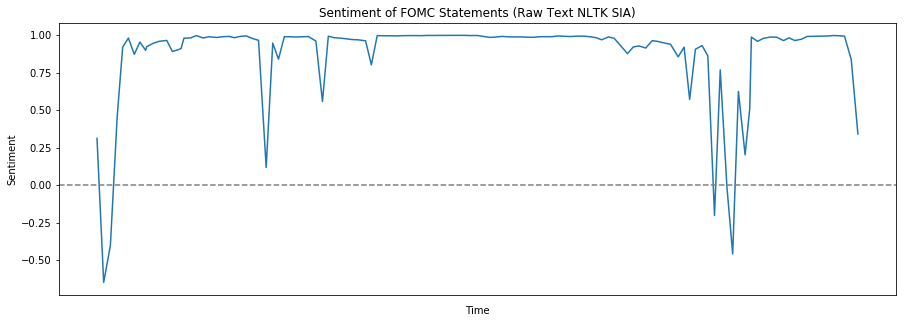

In [135]:
import seaborn as sns
g = sns.lineplot(x='date', y='text_polarity_sia', data=df_fomc_stmts)
g.set(xticklabels=[])
g.set(title='Sentiment of FOMC Statements (Raw Text NLTK SIA)')
g.set(xlabel='Time')
g.set(ylabel='Sentiment')
g.tick_params(bottom=False)

g.axhline(0, ls='--', c = 'grey');

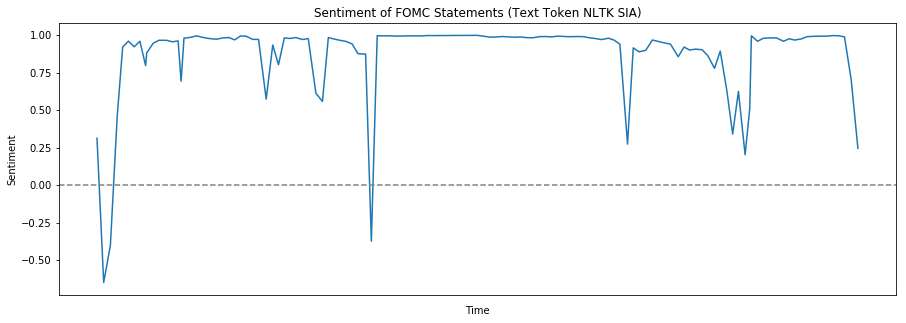

In [136]:
g = sns.lineplot(x='date', y='text_token_polarity_sia', data=df_fomc_stmts)
g.set(xticklabels=[])
g.set(title='Sentiment of FOMC Statements (Text Token NLTK SIA)')
g.set(xlabel='Time')
g.set(ylabel='Sentiment')
g.tick_params(bottom=False)

g.axhline(0, ls='--', c = 'grey');

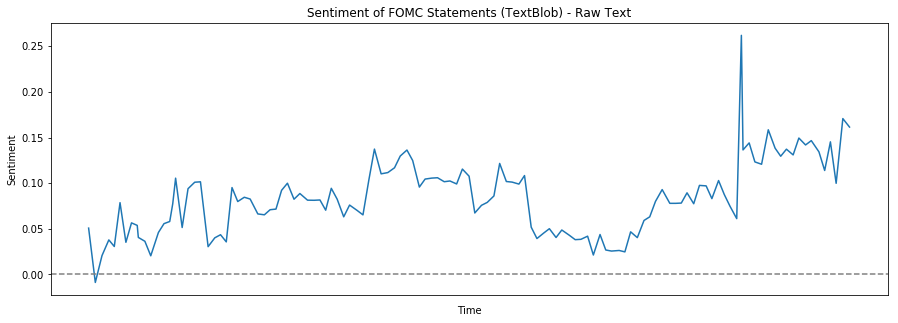

In [137]:
g = sns.lineplot(x='date', y='text_polarity_tb', data=df_fomc_stmts)
g.set(xticklabels=[])
g.set(title='Sentiment of FOMC Statements (TextBlob) - Raw Text')
g.set(xlabel='Time')
g.set(ylabel='Sentiment')
g.tick_params(bottom=False)

g.axhline(0, ls='--', c = 'grey');

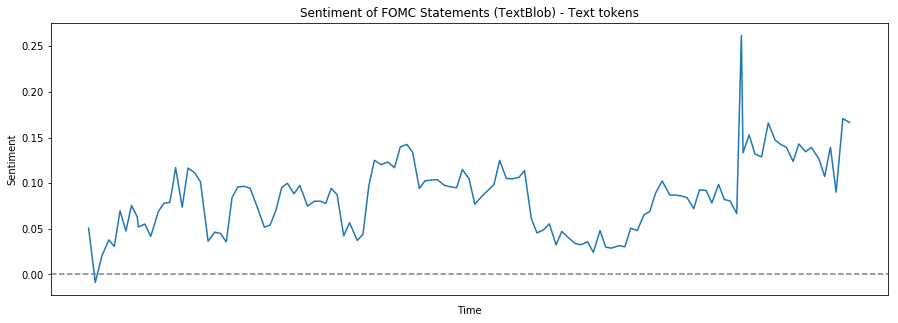

In [138]:
g = sns.lineplot(x='date', y='text_token_polarity_tb', data=df_fomc_stmts)
g.set(xticklabels=[])
g.set(title='Sentiment of FOMC Statements (TextBlob) - Text tokens')
g.set(xlabel='Time')
g.set(ylabel='Sentiment')
g.tick_params(bottom=False)

g.axhline(0, ls='--', c = 'grey');

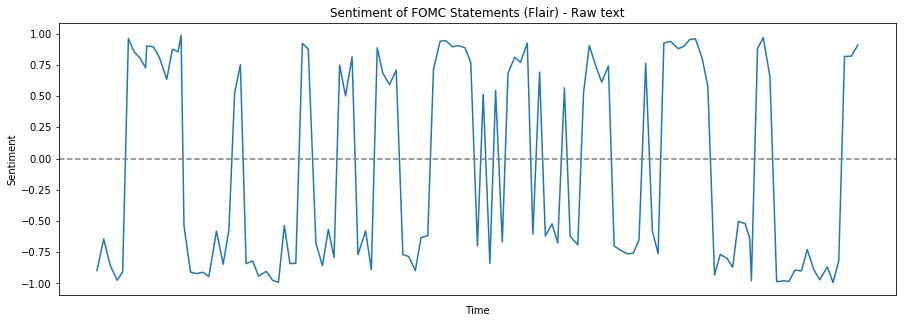

In [139]:
g = sns.lineplot(x='date', y='text_score_fl', data=df_fomc_stmts)
g.set(xticklabels=[])
g.set(title='Sentiment of FOMC Statements (Flair) - Raw text')
g.set(xlabel='Time')
g.set(ylabel='Sentiment')
g.tick_params(bottom=False)

g.axhline(0, ls='--', c = 'grey');

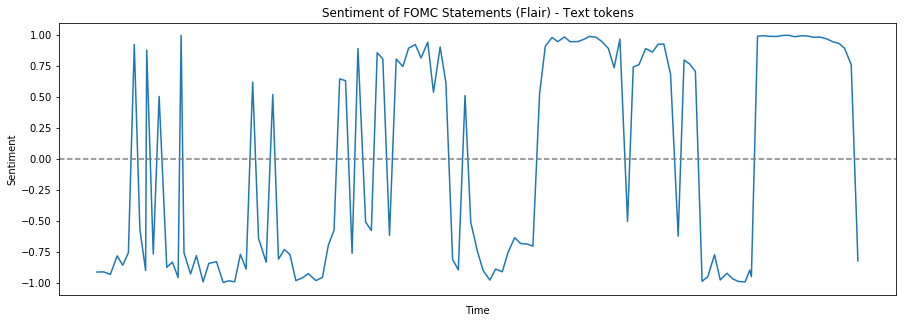

In [140]:
g = sns.lineplot(x='date', y='text_token_score_fl', data=df_fomc_stmts)
g.set(xticklabels=[])
g.set(title='Sentiment of FOMC Statements (Flair) - Text tokens')
g.set(xlabel='Time')
g.set(ylabel='Sentiment')
g.tick_params(bottom=False)

g.axhline(0, ls='--', c = 'grey');

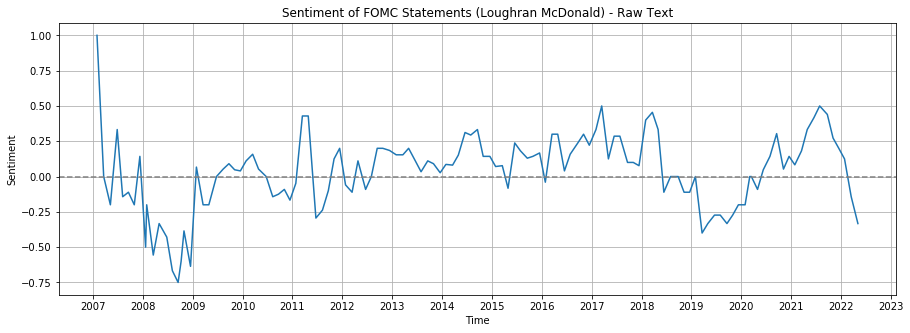

In [141]:
#import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]

fig, g = plt.subplots()

g = sns.lineplot(x='date', y='text_score_lm', data=df_fomc_stmts)
#g.set(xticklabels=[])
g.set(title='Sentiment of FOMC Statements (Loughran McDonald) - Raw Text')
g.set(xlabel='Time')
g.set(ylabel='Sentiment')
g.tick_params(bottom=True)

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')

# format the ticks
g.xaxis.set_major_locator(years)
g.xaxis.set_major_formatter(yearsFmt)
#g.xaxis.set_minor_locator(months)

g.grid(True)
g.axhline(0, ls='--', c = 'grey')

# rotates and right aligns the x labels, and moves the bottom of the axes up to make room for them
#fig.autofmt_xdate()

plt.show()

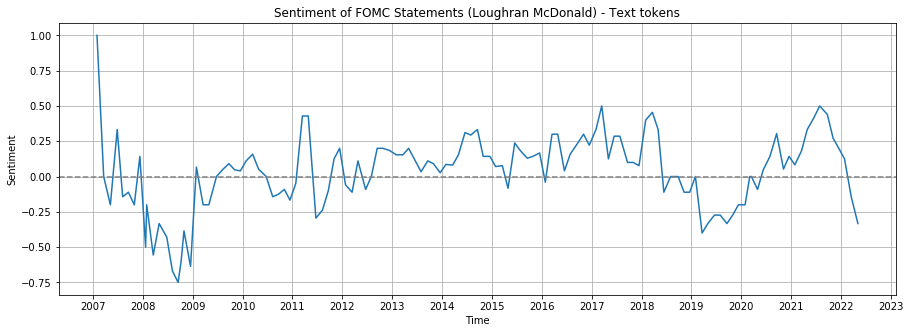

In [142]:
#import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]

fig, g = plt.subplots()

g = sns.lineplot(x='date', y='text_token_score_lm', data=df_fomc_stmts)
#g.set(xticklabels=[])
g.set(title='Sentiment of FOMC Statements (Loughran McDonald) - Text tokens')
g.set(xlabel='Time')
g.set(ylabel='Sentiment')
g.tick_params(bottom=True)

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')

# format the ticks
g.xaxis.set_major_locator(years)
g.xaxis.set_major_formatter(yearsFmt)
#g.xaxis.set_minor_locator(months)

g.grid(True)
g.axhline(0, ls='--', c = 'grey')

# rotates and right aligns the x labels, and moves the bottom of the axes up to make room for them
#fig.autofmt_xdate()

plt.show()

In [143]:
df_fomc_stmts = pd.concat(
    [df_fomc_stmts.drop(['text_polarity_sia', 'text_token_polarity_sia', 
                         'text_polarity_tb', 'text_token_polarity_tb',
                         'text_score_fl', 'text_token_score_fl'], axis=1)])
df_fomc_stmts.head(5)

,statement_id,date,year,chairperson,text,length,text_token,text_score_lm,text_token_score_lm
0,1,2007-01-31,2007,Bernanke,the federal open market committee decided toda...,173,federal open market committee decided today ke...,1.000,1.000
1,2,2007-03-21,2007,Bernanke,the federal open market committee decided toda...,162,federal open market committee decided today ke...,0.000,0.000
2,3,2007-05-09,2007,Bernanke,the federal open market committee decided toda...,161,federal open market committee decided today ke...,-0.200,-0.200
3,4,2007-06-28,2007,Bernanke,the federal open market committee decided toda...,175,federal open market committee decided today ke...,0.333,0.333
4,5,2007-08-07,2007,Bernanke,the federal open market committee decided toda...,204,federal open market committee decided today ke...,-0.143,-0.143


In [144]:
# Confirm there is no difference in the LM sentiment evaluation between raw text and text token ... answer: No diff
sum(df_fomc_stmts['text_score_lm'] - df_fomc_stmts['text_token_score_lm'])

0.0

In [145]:
df_fomc_stmts = pd.concat(
    [df_fomc_stmts.drop(['text_score_lm'], axis=1)])
df_fomc_stmts.head(5)

,statement_id,date,year,chairperson,text,length,text_token,text_token_score_lm
0,1,2007-01-31,2007,Bernanke,the federal open market committee decided toda...,173,federal open market committee decided today ke...,1.000
1,2,2007-03-21,2007,Bernanke,the federal open market committee decided toda...,162,federal open market committee decided today ke...,0.000
2,3,2007-05-09,2007,Bernanke,the federal open market committee decided toda...,161,federal open market committee decided today ke...,-0.200
3,4,2007-06-28,2007,Bernanke,the federal open market committee decided toda...,175,federal open market committee decided today ke...,0.333
4,5,2007-08-07,2007,Bernanke,the federal open market committee decided toda...,204,federal open market committee decided today ke...,-0.143


In [146]:
# Calculate the score change against previous value
df_fomc_stmts['score_lm_diff'] = df_fomc_stmts.text_token_score_lm.diff(periods=1)

In [147]:
df_fomc_stmts.head(5)

,statement_id,date,year,chairperson,text,length,text_token,text_token_score_lm,score_lm_diff
0,1,2007-01-31,2007,Bernanke,the federal open market committee decided toda...,173,federal open market committee decided today ke...,1.000,NaN
1,2,2007-03-21,2007,Bernanke,the federal open market committee decided toda...,162,federal open market committee decided today ke...,0.000,-1.000
2,3,2007-05-09,2007,Bernanke,the federal open market committee decided toda...,161,federal open market committee decided today ke...,-0.200,-0.200
3,4,2007-06-28,2007,Bernanke,the federal open market committee decided toda...,175,federal open market committee decided today ke...,0.333,0.533
4,5,2007-08-07,2007,Bernanke,the federal open market committee decided toda...,204,federal open market committee decided today ke...,-0.143,-0.476


## Diff Plot

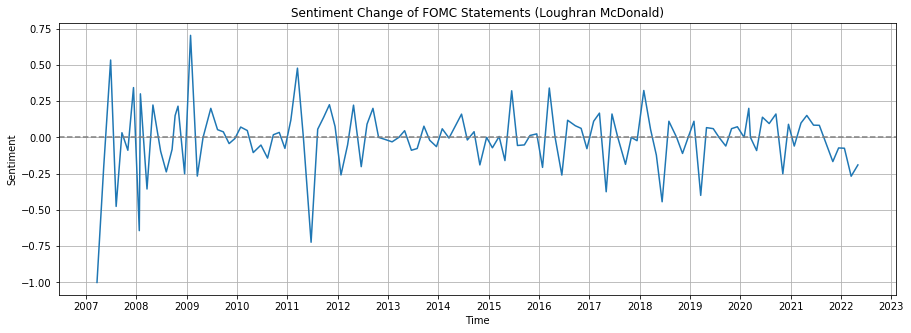

In [148]:
fig, g = plt.subplots()

g = sns.lineplot(x='date', y='score_lm_diff', data=df_fomc_stmts)
#g.set(xticklabels=[])
g.set(title='Sentiment Change of FOMC Statements (Loughran McDonald)')
g.set(xlabel='Time')
g.set(ylabel='Sentiment')
g.tick_params(bottom=True)

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')

# format the ticks
g.xaxis.set_major_locator(years)
g.xaxis.set_major_formatter(yearsFmt)
#g.xaxis.set_minor_locator(months)

g.grid(True)
g.axhline(0, ls='--', c = 'grey')

# rotates and right aligns the x labels, and moves the bottom of the axes up to make room for them
#fig.autofmt_xdate()

plt.show()

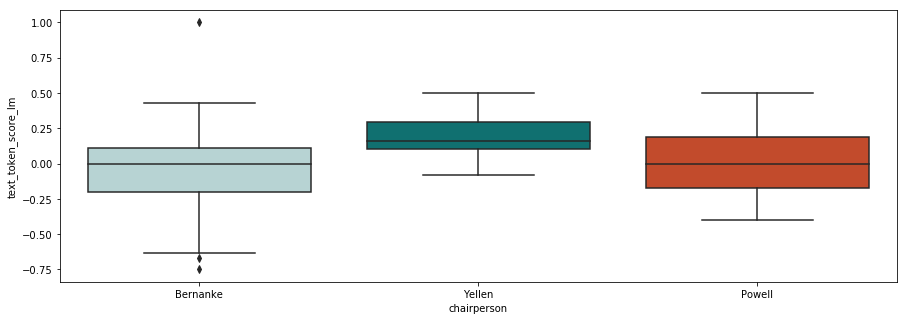

In [149]:
# Boxplot
sns.boxplot(y='text_token_score_lm',
            x='chairperson',
            palette=['#b2d8d8', '#008080', '#db3d13'],
            data=df_fomc_stmts);

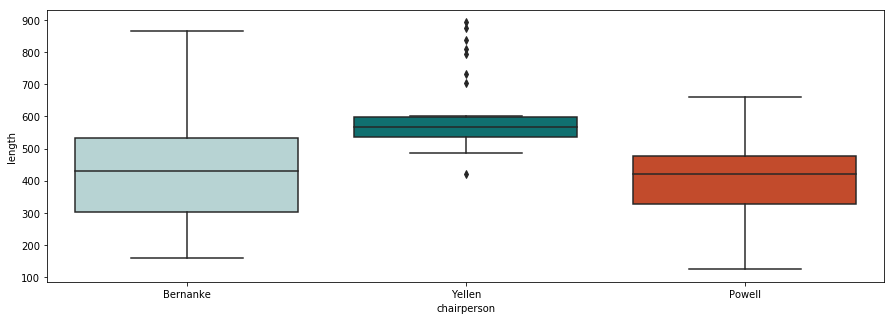

In [150]:
sns.boxplot(y='length',
            x='chairperson',
            palette=['#b2d8d8', '#008080', '#db3d13'],
            data=df_fomc_stmts);

In [151]:
# Finally, write df of fomc statements to CSV
df_fomc_stmts.to_csv('derived/FOMC_statements_with_sentiment_score.csv', index=False)

In [152]:
# https://medium.com/@vijay.prayagala/python-diagnostic-plots-for-ols-linear-regression-plots-similar-to-r-e308091d6072